In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler,OneHotEncoder,LabelEncoder

from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,plot_tree
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,AdaBoostClassifier,AdaBoostRegressor
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import seaborn as sns
import matplotlib.pyplot as plt


## Problem Statement

## Data Gathering

In [3]:
df = pd.read_csv('loan-train.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## EDA

In [4]:
# 'Finding the details of DataFrame like what is the datatype of each columns and 
#  how many non-null values are there'

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
# To check the null values in the DataFrame
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Finding the unique values in each column of the DataFrame

In [6]:
df['Loan_ID'].value_counts()

# each value in 'Loan_ID' columns is unique, so we can drop it as it will not affect our dataframe.

LP002281    1
LP001565    1
LP002493    1
LP002740    1
LP001751    1
           ..
LP002502    1
LP001770    1
LP001473    1
LP002533    1
LP001998    1
Name: Loan_ID, Length: 614, dtype: int64

In [7]:
df['Gender'].value_counts()

# We can drop 'Gender' column as it will not affect the loan eligibility of an individual.

Male      489
Female    112
Name: Gender, dtype: int64

In [8]:
df['Married'].value_counts()

# Marital status does not affect the loan eligibility, so we can drop this feature as well.

Yes    398
No     213
Name: Married, dtype: int64

In [9]:
df['Dependents'].value_counts()

# Number of dependants is an important aspect,so we need to consider it while checking loan eligibility.

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [10]:
df['Education'].value_counts()

# Education is also one of the important features which needs to be taken under consideration.

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [11]:
df['Self_Employed'].value_counts()

# Employment criteria is also the important one to be taken into consideration for loan eligibility.

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [12]:
df['ApplicantIncome'].value_counts()

# ApplicantIncome is the most import criteria to be considered for loan eligibility.

2500    9
6000    6
2600    6
4583    6
4166    5
       ..
5503    1
3450    1
2425    1
2423    1
4095    1
Name: ApplicantIncome, Length: 505, dtype: int64

In [13]:
df['CoapplicantIncome'].value_counts()

# Coapplicant income is the second most import criteria to be considered for loan eligibility.

0.0       273
2500.0      5
2083.0      5
1666.0      5
1625.0      3
         ... 
2365.0      1
1695.0      1
2466.0      1
2375.0      1
1700.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64

In [14]:
df['LoanAmount'].value_counts()

# These are the basic important features needs to be considered for checking loan eligibility.

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
211.0     1
250.0     1
62.0      1
85.0      1
436.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [15]:
df['Loan_Amount_Term'].value_counts()

# These are the basic important features needs to be considered for checking loan eligibility.

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [16]:
df['Credit_History'].value_counts()

# Checking applicants past credit history is also important from loan eligibility perspective.

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [17]:
df['Property_Area'].value_counts()

# Checking property area is also important for finalizing the loan amount and applicant's eligibility.

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

## Feature Engineering

In [18]:
# Dropping the features which are less important while checking loan eligibility.
df.drop('Loan_ID',axis = 1,inplace=True)
df.drop('Married',axis = 1,inplace=True)
df.drop('Gender',axis = 1,inplace=True)

#### Changing the Datatype from object to float/int

In [19]:
df['Dependents'].value_counts().to_dict()

{'0': 345, '1': 102, '2': 101, '3+': 51}

In [20]:
df['Dependents'].replace({'0': 0, '1': 1, '2': 2, '3+': 3}, inplace=True)

In [21]:
df['Education'].value_counts().to_dict()

{'Graduate': 480, 'Not Graduate': 134}

In [22]:
df['Education'].replace({'Graduate': 1, 'Not Graduate': 0},inplace=True)

In [23]:
df['Self_Employed'].value_counts().to_dict()

{'No': 500, 'Yes': 82}

In [24]:
df['Self_Employed'].replace({'No': 0, 'Yes': 1},inplace=True)

In [25]:
df['Property_Area'].value_counts().to_dict()

{'Semiurban': 233, 'Urban': 202, 'Rural': 179}

In [26]:
label_enc = LabelEncoder()
df['Property_Area'] = label_enc.fit_transform(df['Property_Area'])
df['Property_Area'].value_counts()

1    233
2    202
0    179
Name: Property_Area, dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dependents         599 non-null    float64
 1   Education          614 non-null    int64  
 2   Self_Employed      582 non-null    float64
 3   ApplicantIncome    614 non-null    int64  
 4   CoapplicantIncome  614 non-null    float64
 5   LoanAmount         592 non-null    float64
 6   Loan_Amount_Term   600 non-null    float64
 7   Credit_History     564 non-null    float64
 8   Property_Area      614 non-null    int32  
 9   Loan_Status        614 non-null    object 
dtypes: float64(6), int32(1), int64(2), object(1)
memory usage: 45.7+ KB


In [28]:
df['Loan_Status'].value_counts().to_dict()

{'Y': 422, 'N': 192}

In [29]:
df['Loan_Status'].replace({'Y': 1, 'N': 0},inplace = True)

#### Filling The null values

In [30]:
df.isna().mean()*100

Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [31]:
# Dependents,Self_Employed and Credit_History columns are categorical so, we can fill the NaN values with mode.

mode = df['Dependents'].mode()[0]
df['Dependents'].fillna(mode,inplace = True)

# ********************************************************* #

mode = df['Self_Employed'].mode()[0]
df['Self_Employed'].fillna(mode,inplace = True)

# ********************************************************* #

mode = df['Credit_History'].mode()[0]
df['Credit_History'].fillna(mode,inplace = True)
    

In [32]:
# LoanAmount and Loan_Amount_Term are Continuous columns so, need to fill the NaN values with mean

mean = df['LoanAmount'].mean()
df['LoanAmount'].fillna(mean,inplace = True)

# ********************************************************* #

mean = df['Loan_Amount_Term'].mean()
df['Loan_Amount_Term'].fillna(mean,inplace = True)

In [33]:
# Checking if there are any Null values pending in the given DataFrame
df.isna().sum()

Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [34]:
# We have changed the Datatype of all the feature to int or Float. 
# We have also filled all the NaN values in the DataFrame.
# Now we will move for the feature selection Method and further model training procedures.

## Feature Selection

In [35]:
corr = df.corr(method='kendall').tail(1)
corr

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_Status,0.008447,0.085884,-0.0037,-0.003403,0.03046,-0.035654,-0.011417,0.540556,0.028118,1.0


In [36]:
#Features arehaving good correlation(R>=0.8)
def Correlation(df,threshold):
    col_corr=set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.update({colname:corr_matrix})
    return col_corr

Correlation(df,0.8)

set()

### Splitting the data

In [37]:
x = df.drop('Loan_Status',axis = 1)
y = df['Loan_Status']

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=23,test_size=0.25,stratify=y)

# Model Training

### Training Model using Logistic Regression

In [39]:
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Logistic Regression Model Evaluation

In [40]:
# Testing Data Evaluation
y_pred = log_model.predict(x_test)

clf_report = classification_report(y_test,y_pred)
print('Classification report is:',clf_report)

cnf_matrix = confusion_matrix(y_test,y_pred)
print('Confusion matrix is:',cnf_matrix)

acc_score = accuracy_score(y_test,y_pred)
print('accuracy score is:',acc_score)

Classification report is:               precision    recall  f1-score   support

           0       0.87      0.42      0.56        48
           1       0.79      0.97      0.87       106

    accuracy                           0.80       154
   macro avg       0.83      0.69      0.72       154
weighted avg       0.81      0.80      0.77       154

Confusion matrix is: [[ 20  28]
 [  3 103]]
accuracy score is: 0.7987012987012987


In [41]:
# Testing Data Evaluation
y_pred_train = log_model.predict(x_train)

clf_report = classification_report(y_train,y_pred_train)
print('Classification report is:',clf_report)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('Confusion matrix is:',cnf_matrix)

acc_score = accuracy_score(y_train,y_pred_train)
print('accuracy score is:',acc_score)

Classification report is:               precision    recall  f1-score   support

           0       0.91      0.44      0.59       144
           1       0.79      0.98      0.88       316

    accuracy                           0.81       460
   macro avg       0.85      0.71      0.73       460
weighted avg       0.83      0.81      0.79       460

Confusion matrix is: [[ 63  81]
 [  6 310]]
accuracy score is: 0.8108695652173913


In [42]:
# ROC & AUC Curve
y_pred_prob = log_model.predict_proba(x_train)
fpr,tpr,threshold = roc_curve(y_train,y_pred_prob[:,1])


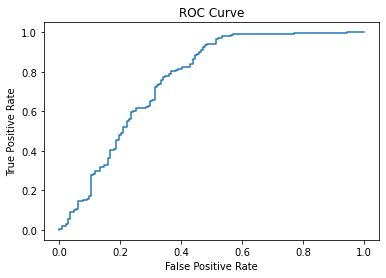

In [43]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.savefig('ROC_Loan_Model.png')

In [44]:
roc_auc_score(y_train,y_pred_prob[:,1])

0.7613176863572433

### Training Model using KNN Classifier

In [45]:
knn_model1 = KNeighborsClassifier()
knn_model1.fit(x_train,y_train)

KNeighborsClassifier()

### KNN Model Evaluation

In [46]:
# Testing Data Evaluation
y_pred = knn_model1.predict(x_test)

clf_report1 = classification_report(y_test,y_pred)
print('Classification report is:',clf_report)

cnf_matrix1 = confusion_matrix(y_test,y_pred)
print('Confusion matrix is:',cnf_matrix)

acc_score1 = accuracy_score(y_test,y_pred)
print('accuracy score is:',acc_score)

Classification report is:               precision    recall  f1-score   support

           0       0.91      0.44      0.59       144
           1       0.79      0.98      0.88       316

    accuracy                           0.81       460
   macro avg       0.85      0.71      0.73       460
weighted avg       0.83      0.81      0.79       460

Confusion matrix is: [[ 63  81]
 [  6 310]]
accuracy score is: 0.8108695652173913


In [47]:
# Training Data Evaluation
y_pred_train = knn_model1.predict(x_train)

clf_report1 = classification_report(y_train,y_pred_train)
print('Classification report is:',clf_report)

cnf_matrix1 = confusion_matrix(y_train,y_pred_train)
print('Confusion matrix is:',cnf_matrix)

acc_score1 = accuracy_score(y_train,y_pred_train)
print('accuracy score is:',acc_score)

Classification report is:               precision    recall  f1-score   support

           0       0.91      0.44      0.59       144
           1       0.79      0.98      0.88       316

    accuracy                           0.81       460
   macro avg       0.85      0.71      0.73       460
weighted avg       0.83      0.81      0.79       460

Confusion matrix is: [[ 63  81]
 [  6 310]]
accuracy score is: 0.8108695652173913


Above accuracies are bad and we cannot consider them while Model building. 
So, we can go for scaling the feature and train the KNN model once again with 
the best Hyperparameters.

#### Feature Scaling

<AxesSubplot:xlabel='Dependents', ylabel='Density'>

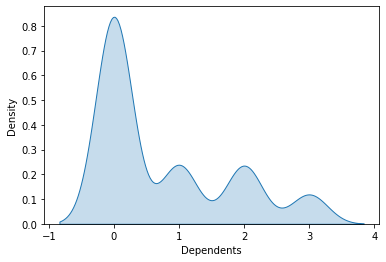

In [48]:
sns.kdeplot(df['Dependents'],fill = True)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

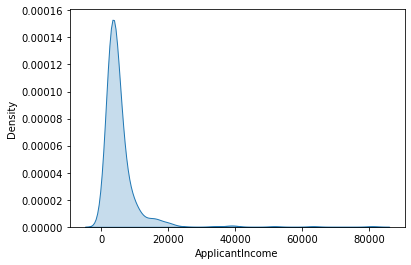

In [49]:
sns.kdeplot(df['ApplicantIncome'],fill = True)

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

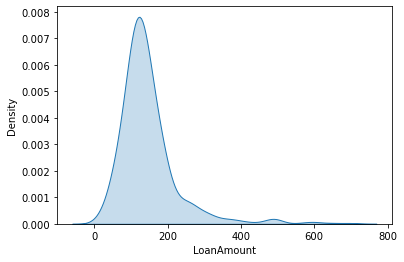

In [50]:
sns.kdeplot(df['LoanAmount'],fill = True)

 From the above graphs, we can say that the features are not normally distributed. So, we can use Normalisation technique for scaling the features.


In [51]:
# Normalization
normal_scalar = MinMaxScaler()
normal_scalar.fit(x)

MinMaxScaler()

In [52]:
normalized_array = normal_scalar.transform(x)
normalized_array.shape

(614, 9)

In [53]:
x_df = pd.DataFrame(normalized_array,columns=x.columns)
x_df

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.743590,1.0,1.0
1,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.743590,1.0,0.0
2,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.743590,1.0,1.0
3,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.743590,1.0,1.0
4,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.743590,1.0,1.0
...,...,...,...,...,...,...,...,...,...
609,0.000000,1.0,0.0,0.034014,0.000000,0.089725,0.743590,1.0,0.0
610,1.000000,1.0,0.0,0.048930,0.000000,0.044863,0.358974,1.0,0.0
611,0.333333,1.0,0.0,0.097984,0.005760,0.353111,0.743590,1.0,1.0
612,0.666667,1.0,0.0,0.091936,0.000000,0.257598,0.743590,1.0,1.0


In [54]:
x_train_s,x_test_x,y_train_s,y_test_s = train_test_split(x_df,y,random_state=23,test_size=0.25,stratify=y)

In [55]:
# Hyperparameter Tuning on Scaled Data

knn_clf_s = KNeighborsClassifier()

hyp = {'n_neighbors':np.arange(2,30),'p':[1,2]}
gscv_knn_clf_s = GridSearchCV(knn_clf_s,hyp,cv = 5)
gscv_knn_clf_s.fit(x_train_s,y_train_s)
gscv_knn_clf_s.best_estimator_
   

KNeighborsClassifier(n_neighbors=11)

In [56]:
# KNN Model after hyperparameter tuning
knn_clf_s = KNeighborsClassifier(n_neighbors=11)
knn_clf_s.fit(x_train_s,y_train_s)

KNeighborsClassifier(n_neighbors=11)

### KNN Model evaluation after Hyperparameter Tuning

In [57]:
# Testing Data Evaluation
y_pred_s = knn_clf_s.predict(x_test_x)

clf_report = classification_report(y_test_s,y_pred_s)
print('Classification report is:',clf_report)

cnf_matrix = confusion_matrix(y_test_s,y_pred_s)
print('Confusion matrix is:',cnf_matrix)

acc_score = accuracy_score(y_test_s,y_pred_s)
print('accuracy score is:',acc_score)

Classification report is:               precision    recall  f1-score   support

           0       0.88      0.44      0.58        48
           1       0.79      0.97      0.87       106

    accuracy                           0.81       154
   macro avg       0.83      0.70      0.73       154
weighted avg       0.82      0.81      0.78       154

Confusion matrix is: [[ 21  27]
 [  3 103]]
accuracy score is: 0.8051948051948052


In [58]:
# Training Data Evaluation
y_pred_train_s = knn_clf_s.predict(x_train_s)

clf_report = classification_report(y_train_s,y_pred_train_s)
print('Classification report is:',clf_report)

cnf_matrix = confusion_matrix(y_train_s,y_pred_train_s)
print('Confusion matrix is:',cnf_matrix)

acc_score = accuracy_score(y_train_s,y_pred_train_s)
print('accuracy score is:',acc_score)

Classification report is:               precision    recall  f1-score   support

           0       0.94      0.44      0.60       144
           1       0.79      0.99      0.88       316

    accuracy                           0.82       460
   macro avg       0.87      0.71      0.74       460
weighted avg       0.84      0.82      0.79       460

Confusion matrix is: [[ 63  81]
 [  4 312]]
accuracy score is: 0.8152173913043478


### Training Model using Decision Tree Classifier

In [59]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

### Decision Tree Model Evaluation

In [60]:
# Testing Data Evaluation
y_pred = dt_clf.predict(x_test)

clf_report = classification_report(y_test,y_pred)
print('Classification report is:',clf_report)

cnf_matrix = confusion_matrix(y_test,y_pred)
print('Confusion matrix is:',cnf_matrix)

acc_score = accuracy_score(y_test,y_pred)
print('accuracy score is:',acc_score)

Classification report is:               precision    recall  f1-score   support

           0       0.49      0.46      0.47        48
           1       0.76      0.78      0.77       106

    accuracy                           0.68       154
   macro avg       0.63      0.62      0.62       154
weighted avg       0.68      0.68      0.68       154

Confusion matrix is: [[22 26]
 [23 83]]
accuracy score is: 0.6818181818181818


In [61]:
# Training Data Evaluation
y_pred_train = dt_clf.predict(x_train)

clf_report = classification_report(y_train,y_pred_train)
print('Classification report is:',clf_report)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('Confusion matrix is:',cnf_matrix)

acc_score = accuracy_score(y_train,y_pred_train)
print('accuracy score is:',acc_score)

Classification report is:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       144
           1       1.00      1.00      1.00       316

    accuracy                           1.00       460
   macro avg       1.00      1.00      1.00       460
weighted avg       1.00      1.00      1.00       460

Confusion matrix is: [[144   0]
 [  0 316]]
accuracy score is: 1.0


####### Looking upon the above evaluation metrices of Decision Tree model, we can clearly see that the model is overfitted. Thus, to avoid this, we will perform hyperparameter tuning and again train the model.####

In [69]:
# Hyperparameter Tuning 

dt_clf2 = DecisionTreeClassifier()

hyp = {'criterion':['gini','entropy'],
        'max_depth':np.arange(3,10),
        'min_samples_split':np.arange(2,20),
        'min_samples_leaf':np.arange(2,10)}

gscv_dt_clf = GridSearchCV(dt_clf2,hyp,cv = 5)
gscv_dt_clf.fit(x_train,y_train)
gscv_dt_clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5)

In [70]:
dt_clf2 = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5)
dt_clf2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5)

### Decision Tree Model after Hyperparameter Tuning

In [74]:
# Testing Data Evaluation
y_pred = dt_clf2.predict(x_test)

clf_report2 = classification_report(y_test,y_pred)
print('Classification report is:',clf_report)

cnf_matrix2 = confusion_matrix(y_test,y_pred)
print('Confusion matrix is:',cnf_matrix)

acc_score2 = accuracy_score(y_test,y_pred)
print('accuracy score is:',acc_score)

Classification report is:               precision    recall  f1-score   support

           0       0.93      0.47      0.62       144
           1       0.80      0.98      0.88       316

    accuracy                           0.82       460
   macro avg       0.87      0.72      0.75       460
weighted avg       0.84      0.82      0.80       460

Confusion matrix is: [[ 67  77]
 [  5 311]]
accuracy score is: 0.8217391304347826


In [75]:
# Training Data Evaluation
y_pred_train = dt_clf2.predict(x_train)

clf_report = classification_report(y_train,y_pred_train)
print('Classification report is:',clf_report)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('Confusion matrix is:',cnf_matrix)

acc_score = accuracy_score(y_train,y_pred_train)
print('accuracy score is:',acc_score)

Classification report is:               precision    recall  f1-score   support

           0       0.93      0.47      0.62       144
           1       0.80      0.98      0.88       316

    accuracy                           0.82       460
   macro avg       0.87      0.72      0.75       460
weighted avg       0.84      0.82      0.80       460

Confusion matrix is: [[ 67  77]
 [  5 311]]
accuracy score is: 0.8217391304347826


In [ ]:
# Plot Decision Tree after Hyperparameter Tuning
plt.figure(figsize=(300,160))
plot_tree(dt_clf,feature_names=x.columns,class_names=['0','1'],filled=True)
plt.savefig('Loan_model_dt.png')

####### We have reduced the overfitting by Hyperparameter tuning, however, we are not getting accuracies to conclude our model as best fit model.#####

### Training Model using Random Forest Classifier

In [76]:
rd_clf1 = RandomForestClassifier()
rd_clf1.fit(x_train,y_train)

RandomForestClassifier()

### Model Evaluation on Random Forest Model

In [77]:
# Testing Data Evaluation
y_pred = rd_clf1.predict(x_test)

clf_report1 = classification_report(y_test,y_pred)
print('Classification report is:',clf_report)

cnf_matrix1 = confusion_matrix(y_test,y_pred)
print('Confusion matrix is:',cnf_matrix)

acc_score1 = accuracy_score(y_test,y_pred)
print('accuracy score is:',acc_score)

Classification report is:               precision    recall  f1-score   support

           0       0.93      0.47      0.62       144
           1       0.80      0.98      0.88       316

    accuracy                           0.82       460
   macro avg       0.87      0.72      0.75       460
weighted avg       0.84      0.82      0.80       460

Confusion matrix is: [[ 67  77]
 [  5 311]]
accuracy score is: 0.8217391304347826


In [78]:
# Training Data Evaluation
y_pred_train = rd_clf1.predict(x_train)

clf_report1 = classification_report(y_train,y_pred_train)
print('Classification report is:',clf_report)

cnf_matrix1 = confusion_matrix(y_train,y_pred_train)
print('Confusion matrix is:',cnf_matrix)

acc_score1 = accuracy_score(y_train,y_pred_train)
print('accuracy score is:',acc_score)

Classification report is:               precision    recall  f1-score   support

           0       0.93      0.47      0.62       144
           1       0.80      0.98      0.88       316

    accuracy                           0.82       460
   macro avg       0.87      0.72      0.75       460
weighted avg       0.84      0.82      0.80       460

Confusion matrix is: [[ 67  77]
 [  5 311]]
accuracy score is: 0.8217391304347826


In [ ]:
# Checking Feature Importance on Model build using Random Forest Classifier

s1 = pd.Series(rd_clf.feature_importances_)
s1.index = x.columns
s1.sort_values().plot(kind = 'barh')

####### Again the model is overfitted for the model trained under Random Forest classifier. So, we will perform hyperparameter training and again evaluate the model to check for the better results.#######

In [79]:
#Hyperparameter Tuning
rd_clf = RandomForestClassifier()

hyp = {'n_estimators':np.arange(10,200),
        'criterion':['gini','entropy'],
        'max_depth':np.arange(5,15),
        'min_samples_split':np.arange(5,20),
        'min_samples_leaf':np.arange(4,15),
        'max_features':['auto']}
rscv_rd_clf = RandomizedSearchCV(rd_clf,hyp,cv = 5)
rscv_rd_clf.fit(x_train,y_train)
rscv_rd_clf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_leaf=13,
                       min_samples_split=10, n_estimators=29)

In [80]:
# Building model after Hyperparameter Tuning
rd_clf2 = RandomForestClassifier(max_depth=12, min_samples_leaf=7, min_samples_split=19,
                       n_estimators=189)
rd_clf2.fit(x_train,y_train)

RandomForestClassifier(max_depth=12, min_samples_leaf=7, min_samples_split=19,
                       n_estimators=189)

### Random Forest Model Evaluation after Hyperparameter Tuning

In [81]:
# Testing Data Evaluation
y_pred = rd_clf2.predict(x_test)

clf_report2 = classification_report(y_test,y_pred)
print('Classification report is:',clf_report)

cnf_matrix2 = confusion_matrix(y_test,y_pred)
print('Confusion matrix is:',cnf_matrix)

acc_score2 = accuracy_score(y_test,y_pred)
print('accuracy score is:',acc_score)

Classification report is:               precision    recall  f1-score   support

           0       0.93      0.47      0.62       144
           1       0.80      0.98      0.88       316

    accuracy                           0.82       460
   macro avg       0.87      0.72      0.75       460
weighted avg       0.84      0.82      0.80       460

Confusion matrix is: [[ 67  77]
 [  5 311]]
accuracy score is: 0.8217391304347826


In [82]:
# Training Data Evaluation
y_pred_train = rd_clf2.predict(x_train)

clf_report2 = classification_report(y_train,y_pred_train)
print('Classification report is:',clf_report)

cnf_matrix2 = confusion_matrix(y_train,y_pred_train)
print('Confusion matrix is:',cnf_matrix)

acc_score2 = accuracy_score(y_train,y_pred_train)
print('accuracy score is:',acc_score)

Classification report is:               precision    recall  f1-score   support

           0       0.93      0.47      0.62       144
           1       0.80      0.98      0.88       316

    accuracy                           0.82       460
   macro avg       0.87      0.72      0.75       460
weighted avg       0.84      0.82      0.80       460

Confusion matrix is: [[ 67  77]
 [  5 311]]
accuracy score is: 0.8217391304347826


### Training Model using Adaboost Classifier

In [83]:
adb_clf1 = AdaBoostClassifier()
adb_clf1.fit(x_train,y_train)

AdaBoostClassifier()

### Model Evaluation on Adaboost Classifier

In [84]:
# Testing Data Evaluation
y_pred = adb_clf1.predict(x_test)

clf_report1 = classification_report(y_test,y_pred)
print('Classification report is:',clf_report)

cnf_matrix1 = confusion_matrix(y_test,y_pred)
print('Confusion matrix is:',cnf_matrix)

acc_score1 = accuracy_score(y_test,y_pred)
print('accuracy score is:',acc_score)

Classification report is:               precision    recall  f1-score   support

           0       0.93      0.47      0.62       144
           1       0.80      0.98      0.88       316

    accuracy                           0.82       460
   macro avg       0.87      0.72      0.75       460
weighted avg       0.84      0.82      0.80       460

Confusion matrix is: [[ 67  77]
 [  5 311]]
accuracy score is: 0.8217391304347826


In [85]:
# Training Data Evaluation
y_pred_train = adb_clf1.predict(x_train)

clf_report1 = classification_report(y_train,y_pred_train)
print('Classification report is:',clf_report)

cnf_matrix1 = confusion_matrix(y_train,y_pred_train)
print('Confusion matrix is:',cnf_matrix)

acc_score1 = accuracy_score(y_train,y_pred_train)
print('accuracy score is:',acc_score)

Classification report is:               precision    recall  f1-score   support

           0       0.93      0.47      0.62       144
           1       0.80      0.98      0.88       316

    accuracy                           0.82       460
   macro avg       0.87      0.72      0.75       460
weighted avg       0.84      0.82      0.80       460

Confusion matrix is: [[ 67  77]
 [  5 311]]
accuracy score is: 0.8217391304347826


In [86]:
# Checking Feature Importance on Model build using Random Forest Classifier

s2 = pd.Series(adb_clf.feature_importances_)
s2.index = x.columns
s2.sort_values().plot(kind = 'barh')

NameError: name 'adb_clf' is not defined

####### Model is overfitted, we will perform hyperparameter tuning and train the model using Adaboost classifier and check the accuracies. ######

In [87]:
# Hyperparameter Tuning 

adb_clf2 = AdaBoostClassifier()

hyp = {'n_estimators':np.arange(2,100),
        'learning_rate':np.arange(1,30)}

rscv_adb_clf = RandomizedSearchCV(adb_clf,hyp,cv = 5)
rscv_adb_clf.fit(x_train,y_train)
rscv_adb_clf.best_estimator_

NameError: name 'adb_clf' is not defined

In [88]:
# Model building after Hyperparameter Tuning

adb_clf2 = AdaBoostClassifier(learning_rate=7, n_estimators=83)
adb_clf2.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=7, n_estimators=83)

### Model Evaluation on Hperparameter Tuned Model

In [89]:
# Testing Data Evaluation
y_pred = adb_clf2.predict(x_test)

clf_report2 = classification_report(y_test,y_pred)
print('Classification report is:',clf_report)

cnf_matrix2 = confusion_matrix(y_test,y_pred)
print('Confusion matrix is:',cnf_matrix)

acc_score2 = accuracy_score(y_test,y_pred)
print('accuracy score is:',acc_score)

Classification report is:               precision    recall  f1-score   support

           0       0.93      0.47      0.62       144
           1       0.80      0.98      0.88       316

    accuracy                           0.82       460
   macro avg       0.87      0.72      0.75       460
weighted avg       0.84      0.82      0.80       460

Confusion matrix is: [[ 67  77]
 [  5 311]]
accuracy score is: 0.8217391304347826


In [90]:
# Training Data Evaluation
y_pred_train = adb_clf2.predict(x_train)

clf_report2 = classification_report(y_train,y_pred_train)
print('Classification report is:',clf_report)

cnf_matrix2 = confusion_matrix(y_train,y_pred_train)
print('Confusion matrix is:',cnf_matrix)

acc_score2 = accuracy_score(y_train,y_pred_train)
print('accuracy score is:',acc_score)

Classification report is:               precision    recall  f1-score   support

           0       0.93      0.47      0.62       144
           1       0.80      0.98      0.88       316

    accuracy                           0.82       460
   macro avg       0.87      0.72      0.75       460
weighted avg       0.84      0.82      0.80       460

Confusion matrix is: [[ 67  77]
 [  5 311]]
accuracy score is: 0.8217391304347826


In [91]:
df.columns

Index(['Dependents', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
def get_predicted_score(Dependents, Education, Self_Employed, ApplicantIncome,
       CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History,
       Property_Area):
    
    input_array = np.array([Dependents, Education, Self_Employed, ApplicantIncome,
       CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History,
       Property_Area],ndmin = 2)
    
    predicted_class = 
    
    
    

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler,OneHotEncoder,LabelEncoder

from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,plot_tree
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,AdaBoostClassifier,AdaBoostRegressor
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
PROBLEM